# UK Property Image Classification - Predict

---

#### Data:
Trying out 10 sample images of old buildings to test out the trained model

#### Initial model results:
80%-90% accuracy. Out of the 2 misclassified images, one is an interior image with relatively bright background, another has a probability of 50/50%

#### Further research:
- add more difficult images eg bright interior images of period buildings
- explore other standard scaling eg min max scaling
- distinguish betweene exterior and interior images


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from math import ceil

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from skimage import io
from skimage import color
from skimage.transform import rescale, resize, downscale_local_mean

import pickle

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model

In [3]:
# For reproducibility
np.random.seed(42)

#### Load the trained model

In [4]:
path = '../data/'
model = load_model(path)


In [5]:
## loading trained scaler
ss = pickle.load(open('../data/scaler.pkl', 'rb'))

#### Load samples for prediction using the trained model

In [6]:
# function to load folder into arrays and  then it returns that same array

def load_files(path):
    # Put files into lists and return them as one list of size 4
    image_files = os.listdir(path)
    return image_files

In [7]:
# feeding images into numpy ndarray

def load_array(image_files, min_size):
    X = np.array([])
    for file in image_files:
        img = io.imread(image_path + file)
        img_resized = resize(img, (min_size,min_size), anti_aliasing=True)
        if X.shape[0] == 0:
            X = np.array([img_resized])
        else:
            X = np.append(X, [img_resized], axis = 0)
    return X

In [8]:
image_path = "../images/predict_samples/"
image_files = load_files(image_path)

# set min_size = 400
min_size = 400

X = load_array(image_files, min_size)
print(f"X shape = {X.shape}")

X shape = (9, 400, 400, 3)


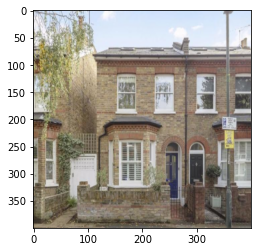

In [9]:
# Try showing the first image
plt.imshow(X[0])

#### Feeding samples to trained model

In [10]:
## flatten X to feed it into Standard Scaler
X_flat = X.flatten().reshape(-1,1)
X_ss = ss.transform(X_flat).reshape(X.shape)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 398, 6)       168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 199, 199, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 197, 197, 16)      880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 153664)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               19669120  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [12]:
y = model.predict(X_ss)
y

array([[3.0793114e-08],
       [1.0905253e-13],
       [9.9999607e-01],
       [9.1773196e-05],
       [9.6874515e-05],
       [6.6820878e-09],
       [2.0729458e-09],
       [5.0802976e-02],
       [3.7600280e-08]], dtype=float32)

In [16]:
y.round(3)[:10]

array([[0.   ],
       [0.   ],
       [1.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.051],
       [0.   ]], dtype=float32)

In [17]:
image_files

['photo-14631104-cRbi8X.jpg',
 'photo-14634104-Zr6xQU.jpg',
 'photo-14636379-lu8vHi.jpg',
 'photo-14636589-PIw37n.jpg',
 'photo-14639764-9cIirq.jpg',
 'photo-14641573-DdYrT7.jpg',
 'photo-14642953-6DimPY.jpg',
 'photo-14662344-XpJKEm.jpg',
 'photo-14670060-XZSQDP.jpg']